<a href="https://colab.research.google.com/github/Rose-DE/WebDevelopers-Survey-analysis/blob/main/DevelopersSurveyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<font color='DarkGreen'> <font face="roboto" size="4"> **IMPORTING TOOLS**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#<font color='DarkGreen'> <font face="roboto" size="4"> **DATA COLLECTION/ EXTRACTION**

In [ ]:
devs = pd.read_csv('survey_results_public.csv')
devs.head(4)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0


In [ ]:
#inspecting the data types
devs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69834 entries, 0 to 69833
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           69834 non-null  int64  
 1   Q120                                 69834 non-null  object 
 2   MainBranch                           69834 non-null  object 
 3   Age                                  69834 non-null  object 
 4   Employment                           68887 non-null  object 
 5   RemoteWork                           59527 non-null  object 
 6   CodingActivities                     59488 non-null  object 
 7   EdLevel                              68942 non-null  object 
 8   LearnCode                            68697 non-null  object 
 9   LearnCodeOnline                      54638 non-null  object 
 10  LearnCodeCoursesCert                 28962 non-null  object 
 11  YearsCode                   

In [ ]:
devs.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,69834.000000,3.955500e+04,35874.000000,3.939400e+04
mean,34917.500000,1.264063e+42,11.647015,1.039065e+05
std,20159.483686,2.514023e+44,8.934020,6.458390e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,17459.250000,6.400000e+04,5.000000,4.604400e+04
50%,34917.500000,1.158000e+05,10.000000,7.608500e+04
75%,52375.750000,2.300000e+05,16.000000,1.244788e+05
max,69834.000000,5.000000e+46,50.000000,7.435143e+07


#<font color='DarkGreen'> <font face="roboto" size="4"> **DATA CLEANING**

In [ ]:
#picking the columns we want by creatin a new data Frame
devs_clean =devs [['ResponseId',	'Age',	'Employment',	'RemoteWork',	'EdLevel',
                   'LearnCodeCoursesCert',	'YearsCode',	'DevType',	'Country',
                   'Currency',	'CompTotal',	'LanguageHaveWorkedWith',
                   'LanguageWantToWorkWith',	'DatabaseHaveWorkedWith',
                   'DatabaseWantToWorkWith',	'PlatformHaveWorkedWith',
                   'PlatformWantToWorkWith',	'WebframeHaveWorkedWith',
                   'WebframeWantToWorkWith',	'NEWCollabToolsHaveWorkedWith',
                   'NEWCollabToolsWantToWorkWith',	'OpSysProfessional use',
                   'ConvertedCompYearly','Industry','WorkExp']]
devs_clean.head()

,ResponseId,Age,Employment,RemoteWork,EdLevel,LearnCodeCoursesCert,YearsCode,DevType,Country,Currency,...,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,ConvertedCompYearly,Industry,WorkExp
0,1,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,...,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,MacOS;Windows;Windows Subsystem for Linux (WSL),285000.0,"Information Services, IT, Software Development...",10.0
2,3,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,27,"Developer, back-end",United States of America,USD\tUnited States dollar,...,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,250000.0,"Information Services, IT, Software Development...",23.0
3,4,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,12,"Developer, front-end",United States of America,USD\tUnited States dollar,...,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,156000.0,NaN,7.0
4,5,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other;Codecademy;edX,6,"Developer, full-stack",Philippines,PHP\tPhilippine peso,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,Other (Please Specify):,23456.0,Other,6.0


In [ ]:
#checking for duplicate values
devs_clean.duplicated().sum()

0

In [ ]:
devs_clean.nunique()

ResponseId                      69834
Age                                 8
Employment                        104
RemoteWork                          3
EdLevel                             8
LearnCodeCoursesCert              204
YearsCode                          52
DevType                            33
Country                           182
Currency                          142
CompTotal                        3394
LanguageHaveWorkedWith          26525
LanguageWantToWorkWith          23707
DatabaseHaveWorkedWith           9525
DatabaseWantToWorkWith           8742
PlatformHaveWorkedWith           5038
PlatformWantToWorkWith           4179
WebframeHaveWorkedWith          12453
WebframeWantToWorkWith          11714
NEWCollabToolsHaveWorkedWith    17393
NEWCollabToolsWantToWorkWith    11301
OpSysProfessional use            2155
ConvertedCompYearly              7721
Industry                           12
WorkExp                            51
dtype: int64

In [ ]:
devs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69834 entries, 0 to 69833
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    69834 non-null  int64  
 1   Age                           69834 non-null  object 
 2   Employment                    68887 non-null  object 
 3   RemoteWork                    59527 non-null  object 
 4   EdLevel                       68942 non-null  object 
 5   LearnCodeCoursesCert          28962 non-null  object 
 6   YearsCode                     68546 non-null  object 
 7   DevType                       61721 non-null  object 
 8   Country                       68942 non-null  object 
 9   Currency                      53206 non-null  object 
 10  CompTotal                     39555 non-null  float64
 11  LanguageHaveWorkedWith        68325 non-null  object 
 12  LanguageWantToWorkWith        63280 non-null  object 
 13  D

In [ ]:
# Convert 'YearsCode' column to integer
devs_clean['YearsCode'] = pd.to_numeric(devs_clean['YearsCode'],
                          errors='coerce', downcast='integer')
devs_clean.head(5)


<ipython-input-45-fa2226e3f141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devs_clean['YearsCode'] = pd.to_numeric(devs_clean['YearsCode'],


,ResponseId,Age,Employment,RemoteWork,EdLevel,LearnCodeCoursesCert,YearsCode,DevType,Country,Currency,...,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,ConvertedCompYearly,Industry,WorkExp
0,1,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,...,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,MacOS;Windows;Windows Subsystem for Linux (WSL),285000.0,"Information Services, IT, Software Development...",10.0
2,3,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,27.0,"Developer, back-end",United States of America,USD\tUnited States dollar,...,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,250000.0,"Information Services, IT, Software Development...",23.0
3,4,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,12.0,"Developer, front-end",United States of America,USD\tUnited States dollar,...,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,156000.0,NaN,7.0
4,5,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other;Codecademy;edX,6.0,"Developer, full-stack",Philippines,PHP\tPhilippine peso,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,Other (Please Specify):,23456.0,Other,6.0


In [ ]:
devs_clean.describe()

,ResponseId,YearsCode,CompTotal,ConvertedCompYearly,WorkExp
count,69834.000000,67655.000000,3.955500e+04,3.939400e+04,35874.000000
mean,34917.500000,14.504915,1.264063e+42,1.039065e+05,11.647015
std,20159.483686,10.100547,2.514023e+44,6.458390e+05,8.934020
min,1.000000,1.000000,0.000000e+00,1.000000e+00,0.000000
25%,17459.250000,7.000000,6.400000e+04,4.604400e+04,5.000000
50%,34917.500000,12.000000,1.158000e+05,7.608500e+04,10.000000
75%,52375.750000,20.000000,2.300000e+05,1.244788e+05,16.000000
max,69834.000000,50.000000,5.000000e+46,7.435143e+07,50.000000


In [ ]:
#checking for null values
devs_clean.isnull().sum()

ResponseId                          0
Age                                 0
Employment                        947
RemoteWork                      10307
EdLevel                           892
LearnCodeCoursesCert            40872
YearsCode                        2179
DevType                          8113
Country                           892
Currency                        16628
CompTotal                       30279
LanguageHaveWorkedWith           1509
LanguageWantToWorkWith           6554
DatabaseHaveWorkedWith          12025
DatabaseWantToWorkWith          21821
PlatformHaveWorkedWith          19475
PlatformWantToWorkWith          29274
WebframeHaveWorkedWith          17356
WebframeWantToWorkWith          25459
NEWCollabToolsHaveWorkedWith     2470
NEWCollabToolsWantToWorkWith     9748
OpSysProfessional use            7945
ConvertedCompYearly             30440
Industry                        39511
WorkExp                         33960
dtype: int64

In [ ]:
#dropping the columns we dont need, the column CompTotal has combined data in the two columns
devs_clean=devs_clean.drop(columns=['Currency','CompTotal'])
devs_clean.head(5)

,ResponseId,Age,Employment,RemoteWork,EdLevel,LearnCodeCoursesCert,YearsCode,DevType,Country,LanguageHaveWorkedWith,...,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,ConvertedCompYearly,Industry,WorkExp
0,1,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,HTML/CSS;JavaScript;Python,...,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,MacOS;Windows;Windows Subsystem for Linux (WSL),285000.0,"Information Services, IT, Software Development...",10.0
2,3,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,27.0,"Developer, back-end",United States of America,Bash/Shell (all shells);Go,...,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,250000.0,"Information Services, IT, Software Development...",23.0
3,4,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,12.0,"Developer, front-end",United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,...,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,156000.0,NaN,7.0
4,5,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other;Codecademy;edX,6.0,"Developer, full-stack",Philippines,HTML/CSS;JavaScript;TypeScript,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,Other (Please Specify):,23456.0,Other,6.0


In [ ]:
#finding the mean of years code
mean_years= devs_clean['YearsCode'].mean()

In [ ]:
#replacing the null values in the column
devs_clean.YearsCode=devs_clean.YearsCode.fillna(value=mean_years)

In [ ]:
devs_clean.isnull().sum()

ResponseId                          0
Age                                 0
Employment                        947
RemoteWork                      10307
EdLevel                           892
LearnCodeCoursesCert            40872
YearsCode                           0
DevType                          8113
Country                           892
LanguageHaveWorkedWith           1509
LanguageWantToWorkWith           6554
DatabaseHaveWorkedWith          12025
DatabaseWantToWorkWith          21821
PlatformHaveWorkedWith          19475
PlatformWantToWorkWith          29274
WebframeHaveWorkedWith          17356
WebframeWantToWorkWith          25459
NEWCollabToolsHaveWorkedWith     2470
NEWCollabToolsWantToWorkWith     9748
OpSysProfessional use            7945
ConvertedCompYearly             30440
Industry                        39511
WorkExp                         33960
dtype: int64

In [ ]:
#
devs_clean = devs_clean.dropna(subset=['Employment'])
devs_clean = devs_clean.dropna(subset=['RemoteWork'])
devs_clean = devs_clean.dropna(subset=['LearnCodeCoursesCert'])
devs_clean = devs_clean.dropna(subset=['DevType'])
devs_clean = devs_clean.dropna(subset=['LanguageHaveWorkedWith'])
devs_clean = devs_clean.dropna(subset=['LanguageWantToWorkWith'])
devs_clean = devs_clean.dropna(subset=['DatabaseHaveWorkedWith'])
devs_clean = devs_clean.dropna(subset=['DatabaseWantToWorkWith'])
devs_clean = devs_clean.dropna(subset=['PlatformHaveWorkedWith'])
devs_clean = devs_clean.dropna(subset=['PlatformWantToWorkWith'])
devs_clean = devs_clean.dropna(subset=['WebframeHaveWorkedWith'])
devs_clean = devs_clean.dropna(subset=['WebframeWantToWorkWith'])
devs_clean = devs_clean.dropna(subset=['NEWCollabToolsHaveWorkedWith'])
devs_clean = devs_clean.dropna(subset=['NEWCollabToolsWantToWorkWith'])
devs_clean = devs_clean.dropna(subset=['OpSysProfessional use'])
devs_clean = devs_clean.dropna(subset=['Industry'])



devs_clean.isnull().sum()

ResponseId                         0
Age                                0
Employment                         0
RemoteWork                         0
EdLevel                            0
LearnCodeCoursesCert               0
YearsCode                          0
DevType                            0
Country                            0
LanguageHaveWorkedWith             0
LanguageWantToWorkWith             0
DatabaseHaveWorkedWith             0
DatabaseWantToWorkWith             0
PlatformHaveWorkedWith             0
PlatformWantToWorkWith             0
WebframeHaveWorkedWith             0
WebframeWantToWorkWith             0
NEWCollabToolsHaveWorkedWith       0
NEWCollabToolsWantToWorkWith       0
OpSysProfessional use              0
ConvertedCompYearly             1829
Industry                           0
WorkExp                           18
dtype: int64

In [ ]:
mean_comp= devs_clean['ConvertedCompYearly'].mean()
devs_clean.ConvertedCompYearly=devs_clean.ConvertedCompYearly.fillna(value=mean_comp)
devs_clean.isnull().sum()

ResponseId                       0
Age                              0
Employment                       0
RemoteWork                       0
EdLevel                          0
LearnCodeCoursesCert             0
YearsCode                        0
DevType                          0
Country                          0
LanguageHaveWorkedWith           0
LanguageWantToWorkWith           0
DatabaseHaveWorkedWith           0
DatabaseWantToWorkWith           0
PlatformHaveWorkedWith           0
PlatformWantToWorkWith           0
WebframeHaveWorkedWith           0
WebframeWantToWorkWith           0
NEWCollabToolsHaveWorkedWith     0
NEWCollabToolsWantToWorkWith     0
OpSysProfessional use            0
ConvertedCompYearly              0
Industry                         0
WorkExp                         18
dtype: int64

In [ ]:
devs_clean.rename(columns=
    {'ConvertedCompYearly':'Yearly compensation(USD)',
    'OpSysProfessional use': 'Operating System',
     'YearsCode': 'Years of Coding'}
)

,ResponseId,Age,Employment,RemoteWork,EdLevel,LearnCodeCoursesCert,Years of Coding,DevType,Country,LanguageHaveWorkedWith,...,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,Operating System,Yearly compensation(USD),Industry,WorkExp
1,2,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,HTML/CSS;JavaScript;Python,...,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,MacOS;Windows;Windows Subsystem for Linux (WSL),285000.00000,"Information Services, IT, Software Development...",10.0
4,5,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other;Codecademy;edX,6.0,"Developer, full-stack",Philippines,HTML/CSS;JavaScript;TypeScript,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Vim;Visual Studio Code,Vim;Visual Studio Code,Other (Please Specify):,23456.00000,Other,6.0
7,8,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Codecademy;edX,5.0,"Developer, full-stack",United States of America,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,...,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,Amazon Web Services (AWS);Digital Ocean;Fly.io...,Angular;Express;Next.js;Node.js;React,Deno;FastAPI;Fastify;Flask;NestJS;Next.js;Node...,DataGrip;IPython;Neovim;Vim;Visual Studio Code,IPython;Neovim;RStudio;Visual Studio Code,MacOS;Ubuntu;Windows,80000.00000,Financial Services,5.0
12,13,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Codecademy,10.0,"Developer, full-stack",United States of America,Bash/Shell (all shells);Elixir;HTML/CSS;JavaSc...,...,Amazon Web Services (AWS);Digital Ocean;Fly.io...,Amazon Web Services (AWS);Fly.io;Render,Angular;AngularJS;Elm;Express;Gatsby;jQuery;Ne...,Gatsby;Phoenix,Neovim;Vim,Neovim,Arch;Debian;Ubuntu,75000.00000,Other,9.0
26,27,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,16.0,"Developer, back-end",Belgium,Bash/Shell (all shells);C#;Go;JavaScript;PHP;R...,...,Cloudflare;Hetzner,Cloudflare;Hetzner;Vercel,Laravel;Symfony;Vue.js,Laravel;Vue.js,DataGrip;Goland;IntelliJ IDEA;PhpStorm;Rider;V...,DataGrip;Goland;IntelliJ IDEA;Neovim;PhpStorm;...,Ubuntu,82967.43008,"Information Services, IT, Software Development...",9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69805,69806,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Udemy;Pluralsight;Udacity,28.0,"Developer, full-stack",Mexico,C#;HTML/CSS;JavaScript;PowerShell;Python;SQL;T...,...,Microsoft Azure,Amazon Web Services (AWS);Microsoft Azure,ASP.NET;ASP.NET CORE;Blazor;Express;jQuery;Nod...,ASP.NET CORE;Blazor;React,Android Studio;Notepad++;Visual Studio;Visual ...,Android Studio;Visual Studio;Visual Studio Cod...,Android;iOS;MacOS;Windows,82967.43008,Financial Services,20.0
69810,69811,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Pluralsight;Coursera;Udacity,20.0,"Developer, back-end",Colombia,C;Go;HTML/CSS;Java;JavaScript;Objective-C;Perl...,...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Google Cloud,Angular;CodeIgniter;Django;FastAPI;Flask;jQuer...,AngularJS;Django;FastAPI;Flask,Android Studio;Atom;DataGrip;Eclipse;Geany;Gol...,Android Studio;IPython;Jupyter Notebook/Jupyte...,MacOS;Ubuntu,46049.00000,"Information Services, IT, Software Developmen

#<font color='DarkGreen'> <font face="roboto" size="4"> **DATA VISUALIZATIONS**

###<font color='black'> <font face="roboto" size="3">
##Univariate Exploration

###<font color='black'> <font face="roboto" size="4"> ***Number of people who use each programming language***

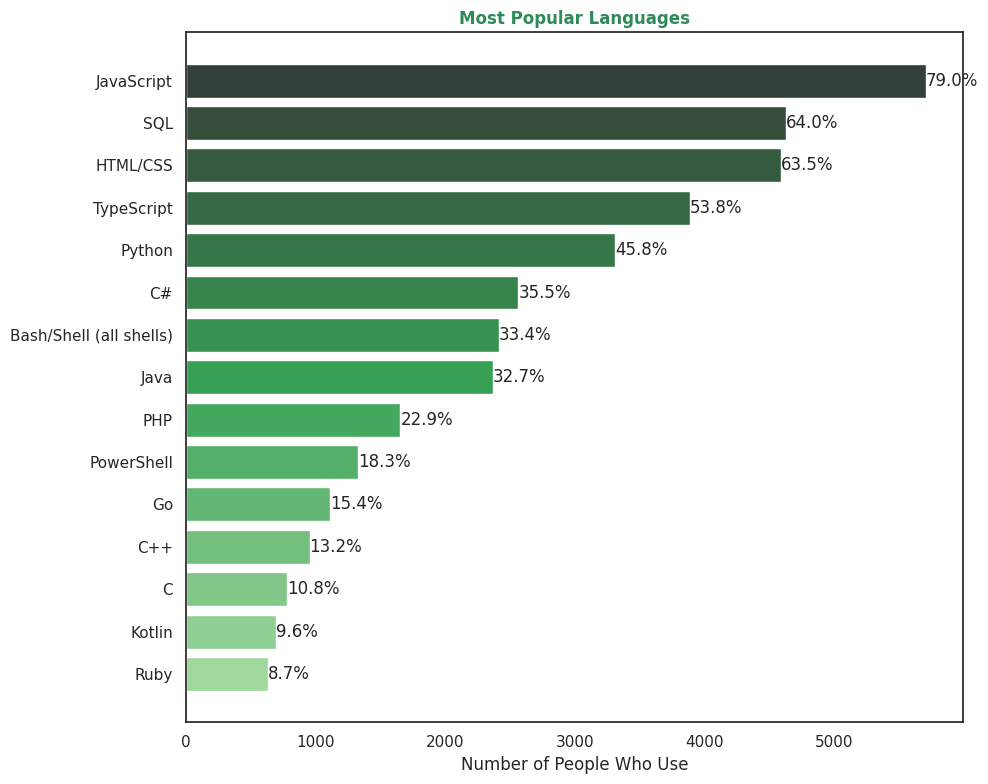

In [ ]:
 # 15 Most popular Languages
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
# plt.style.use('seaborn-white')

#ids = devs_clean['ResponseId']
lang_responses = devs_clean['LanguageHaveWorkedWith']
language_counter = Counter()

for response in lang_responses:
    if isinstance(response, str):  # Checks if the response is a string
        language_counter.update(response.split(';'))

languages = []
popularity = []

total_responses = len(lang_responses)

for language, count in language_counter.most_common(15):
    languages.append(language)
    popularity.append(count)

languages.reverse()
popularity.reverse()

fig, ax = plt.subplots(figsize=(10, 8))

bars = plt.barh(languages, popularity,
                color=sns.color_palette("Greens_d",len(languages)))

plt.title("Most Popular Languages", color = 'seagreen',fontweight='bold')
plt.xlabel("Number of People Who Use")

# Add percentages on the bars
for bar, count in zip(bars, popularity):
    percent = count / total_responses * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{percent:.1f}%", ha='left', va='center')

plt.tight_layout()

###<font color='black'> <font face="roboto" size="4">
*JavaScript is the most preffered language among the developers*


###<font color='black'> <font face="roboto" size="4"> ***Top 5 languages that Devs have worked with***##


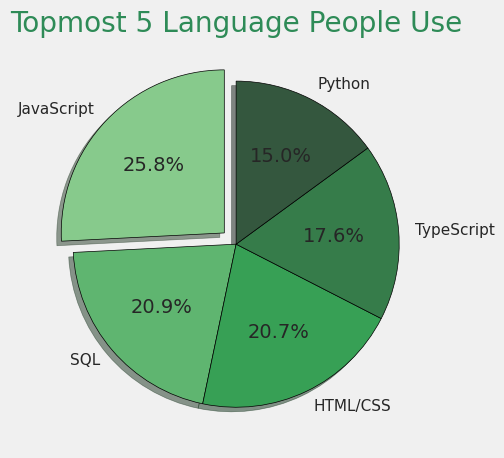

In [ ]:
# Top 5 popular Languages
sns.set(style='white')

lang_responses = devs_clean['LanguageHaveWorkedWith']
language_counter = Counter()

for response in lang_responses:
    if isinstance(response, str):  # Checks if the response is a string
        language_counter.update(response.split(';'))

languages = []
popularity = []

total_responses = len(lang_responses)

for language, count in language_counter.most_common(5):
    languages.append(language)
    popularity.append(count)

# print(languages)
# print(popularity)

plt.style.use('fivethirtyeight')

slices = popularity
labels = languages
explode = [0.1,0,0,0,0]
colors = sns.color_palette("Greens_d",len(languages))
#colors = ['darkgreen','green','forestgreen','seagreen','mediumseagreen']

plt.pie(slices, labels = labels,explode = explode,shadow = True,startangle = 90,
       colors = colors, autopct='%1.1f%%', wedgeprops = {'edgecolor' : 'black'})

plt.title('Topmost 5 Language People Use',color = 'seagreen')
plt.tight_layout()

###<font color='black'> <font face="roboto" size="4">
*Javascript also has the highest distribution of popularity among the top 5 programming languages.*

###<font color='black'> <font face="roboto" size="4"> ***Countries with the most developers***

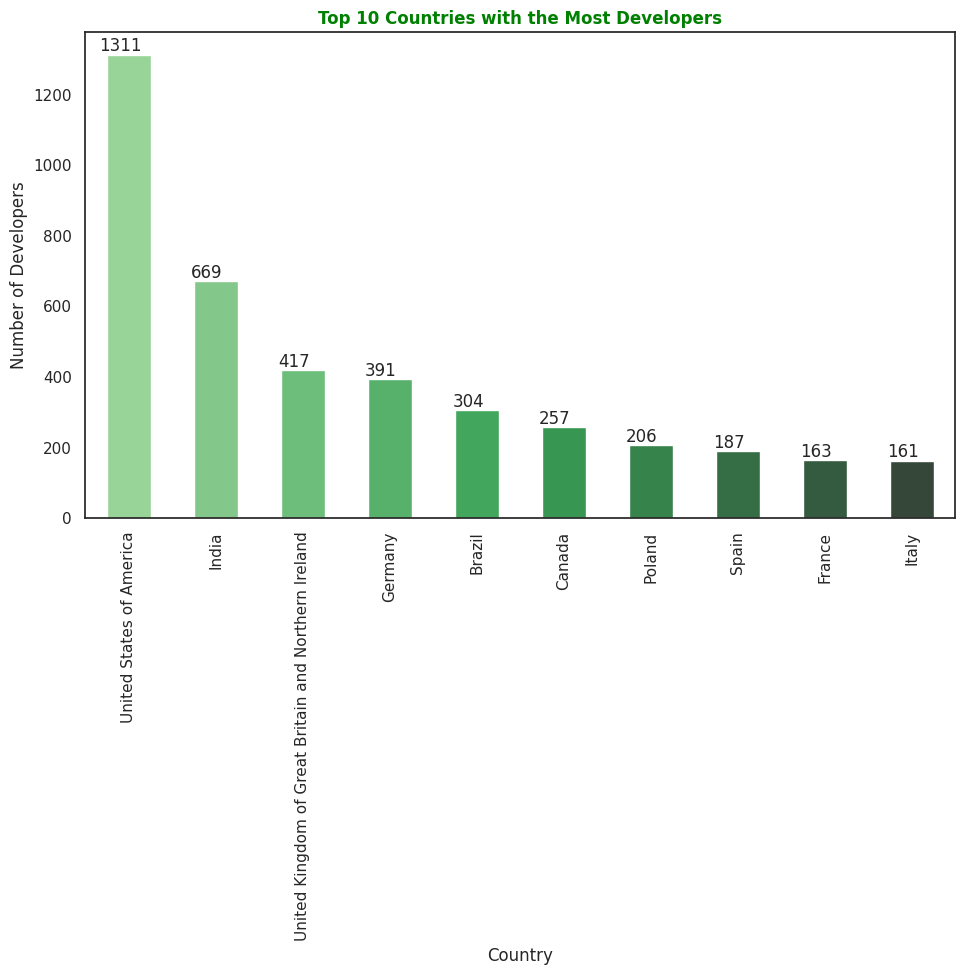

In [ ]:
#country with most developers
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

country_counts = devs_clean['Country'].value_counts()
top_10_countries = country_counts.head(10)

# Plotting the bar graph for the top 10 countries
plt.figure(figsize=(10, 6))
ax = top_10_countries.plot(kind='bar',
                      color=sns.color_palette("Greens_d",len(top_10_countries)))
plt.title('Top 10 Countries with the Most Developers',
          fontweight='bold',color='Green')
plt.xlabel('Country')
plt.ylabel('Number of Developers')
# Adding count labels on top of the bars
for bar, count in zip(ax.patches, top_10_countries.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1,
             str(count), ha='center', va='bottom')


plt.show()

###<font color='black'> <font face="roboto" size="4">
*United States has the highest number of developers compared to other countries*

###<font color='black'> <font face="roboto" size="4"> ***Most preferred Operating System***

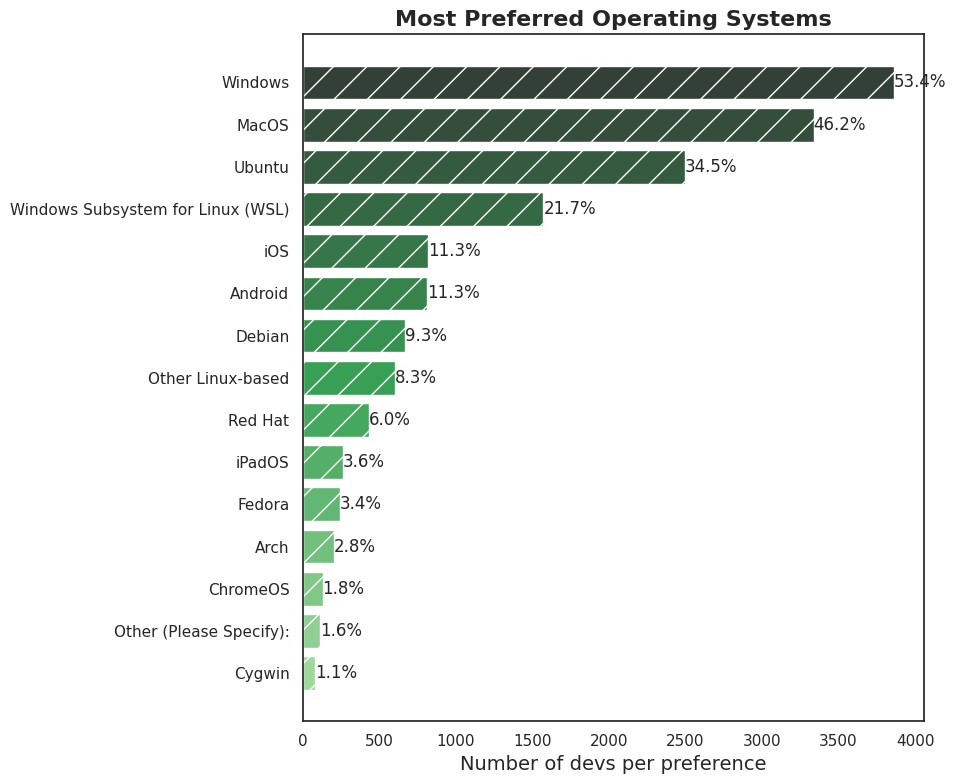

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
#sns.set_style("darkgrid")
sns.set(style='white')
# dark background grid

# Access operating system responses
os_responses = devs_clean['OpSysProfessional use']

# Count operating system occurrences
os_counter = Counter()
for response in os_responses:
    if isinstance(response, str):
        os_counter.update(response.split(';'))

# Prepare data for visualization
operating_systems = []
popularity = []
total_responses = len(os_responses)
for os, count in os_counter.most_common(15):
    operating_systems.append(os)
    popularity.append(count)
operating_systems.reverse()
popularity.reverse()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# colors and formatting
colors = sns.color_palette("Greens_d", len(operating_systems))
# deep green color palette
bars = plt.barh(operating_systems, popularity, color=colors)

# Further styling
for i, bar in enumerate(bars):
    bars[i].set_hatch('/')
# Add hatching for visual interest

# Informative title and labels
plt.title("Most Preferred Operating Systems", fontsize=16, fontweight='bold')
plt.xlabel("Number of devs per preference", fontsize=14)

# Add percentages on the bars
for bar, count in zip(bars, popularity):
    percent = count / total_responses * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{percent:.1f}%", ha='left', va='center', fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(left=0.35)
# Add more space for long OS names

# Display the bar chart
plt.show()

###<font color='black'> <font face="roboto" size="4">
*Majority of the developeres prefer working with the Windows operating system*

###<font color='black'> <font face="roboto" size="4"> ***Most Preffered Database***

<ipython-input-59-4b6933357acb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=Top_five.index, y=Top_five['DatabaseHaveWorkedWith'],palette="Greens")


[Text(0.5, 0, 'Databases'),
 Text(0, 0.5, 'Number of users'),
 Text(0.5, 1.0, 'Most Preffered Database')]

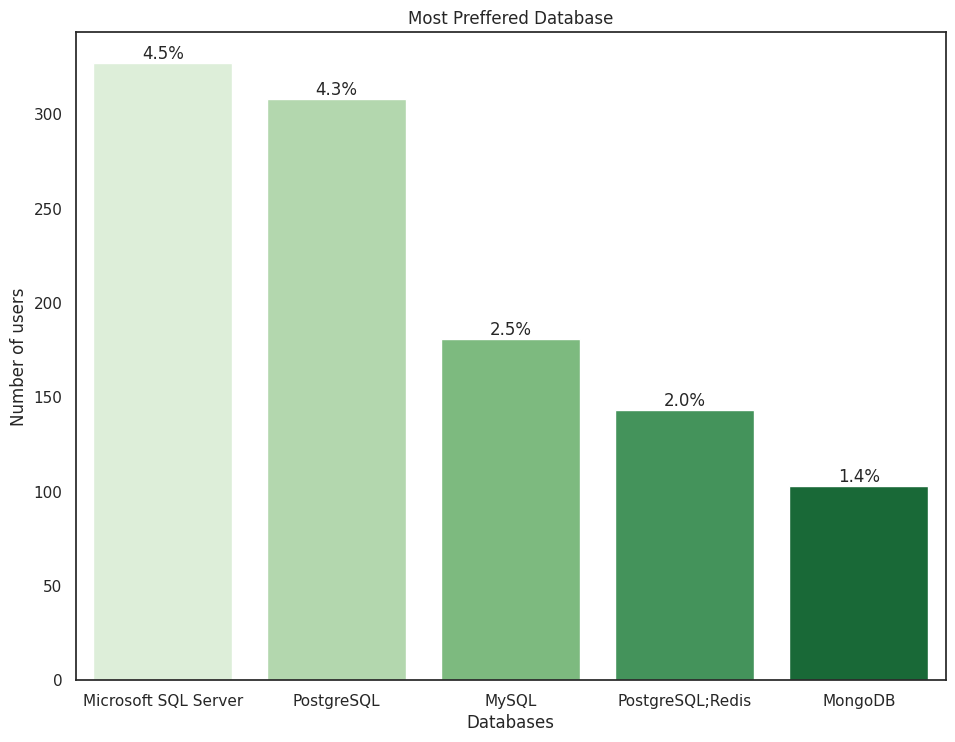

In [ ]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='white')

#Dataframes
devs_clean['DatabaseHaveWorkedWith'].value_counts()
pd.DataFrame(devs_clean['DatabaseHaveWorkedWith'].value_counts())
pd.DataFrame(devs_clean['DatabaseHaveWorkedWith'].value_counts()).head(5)
Top_five=pd.DataFrame(devs_clean['DatabaseHaveWorkedWith'].value_counts()).head(5)

plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
ax=sns.barplot(x=Top_five.index, y=Top_five['DatabaseHaveWorkedWith'],palette="Greens")

total_count = len(devs_clean['DatabaseHaveWorkedWith'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set(xlabel='Databases', ylabel='Number of users',title='Most Preffered Database')


###<font color='black'> <font face="roboto" size="4">
*Microsoft SQL Server is the most preffered database among the developers.*

###<font color='black'> <font face="roboto" size="4"> ***Most Popular Industry***

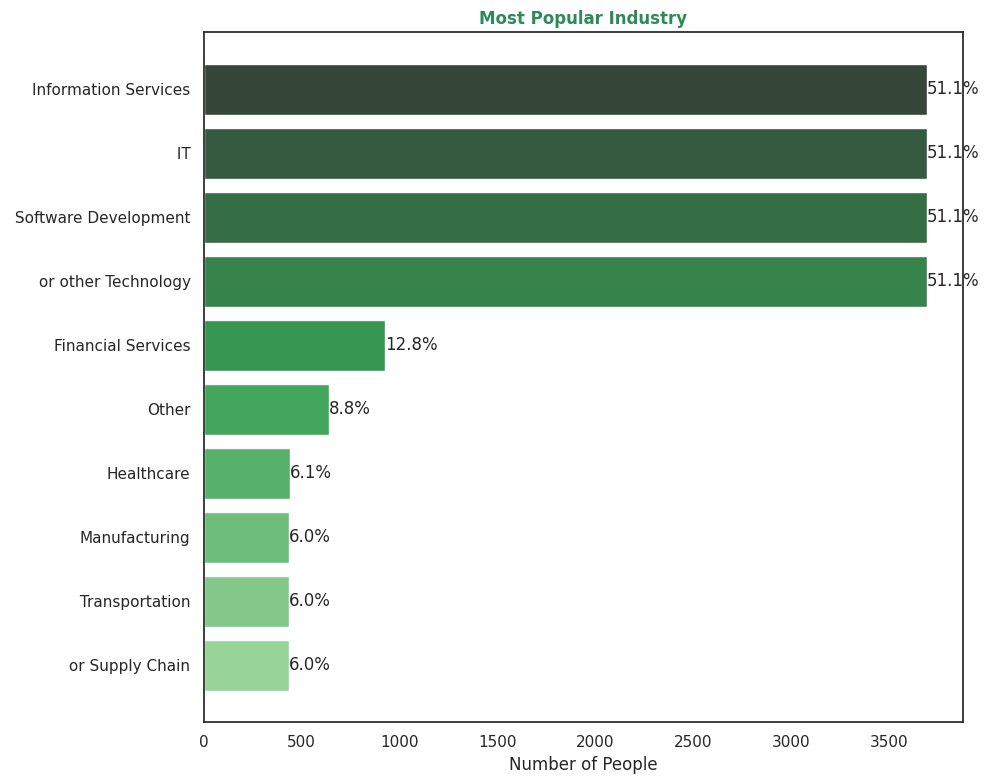

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

sns.set(style='white')
# plt.style.use('seaborn-white')

#ids = devs_clean['ResponseId']
industry_responses = devs_clean['Industry']
industry_counter = Counter()

for response in industry_responses:
    if isinstance(response, str):  # Checks if the response is a string
        industry_counter.update(response.split(','))

Industries = []
popularity = []

total_responses = len(industry_responses)

for Industry, count in industry_counter.most_common(10):
    Industries.append(Industry)
    popularity.append(count)

Industries.reverse()
popularity.reverse()

fig, ax = plt.subplots(figsize=(10, 8))

bars = plt.barh(Industries, popularity,
                color=sns.color_palette("Greens_d",len(Industries)))

plt.title("Most Popular Industry", color = 'seagreen',fontweight='bold')
plt.xlabel("Number of People")

# Add percentages on the bars
for bar, count in zip(bars, popularity):
    percent = count / total_responses * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{percent:.1f}%", ha='left', va='center')

plt.tight_layout()

###<font color='black'> <font face="roboto" size="4">
*The majority of the survey respondents work in the information services industry*

###<font color='black'> <font face="roboto" size="4"> ***Age of respondents***

In [ ]:
devs_clean['Age'] = devs_clean['Age'].replace('Under 18 years old',
                                              '0-17 years old')

Text(0.5, 1.0, 'Age Distribution (Heatmap)')

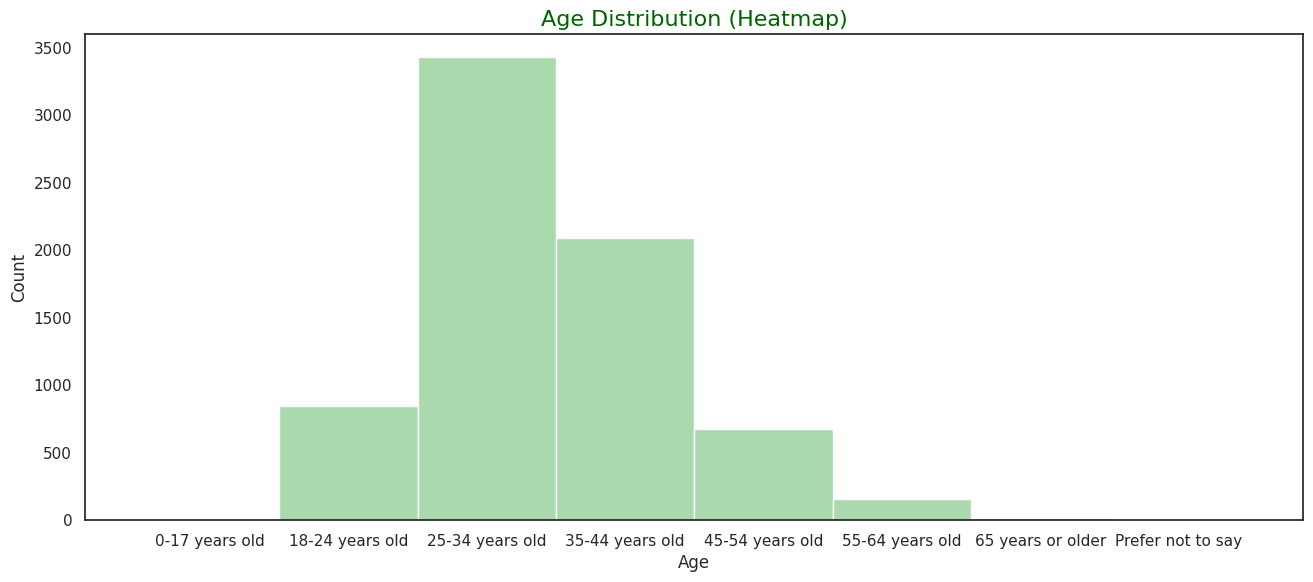

In [ ]:
import seaborn as sns

sns.set(style='white')

# Sort ages in ascending order
sorted_ages = sorted(devs_clean['Age'])


# Create a histogram
plt.figure(figsize=(14, 6))
sns.histplot(sorted_ages, bins=range(18, 101, 5),
              color=sns.color_palette("Greens_d")[0], kde=False)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution (Heatmap)', fontsize=16, color = 'darkgreen')
#plt.grid(axis='y', linestyle='--', alpha=0.5)


###<font color='black'> <font face="roboto" size="4">
*The majority of the survey respondents were in the 24-35 years age bracket*

###<font color='black'> <font face="roboto" size="4"> ***Languages that Developers want to work with***


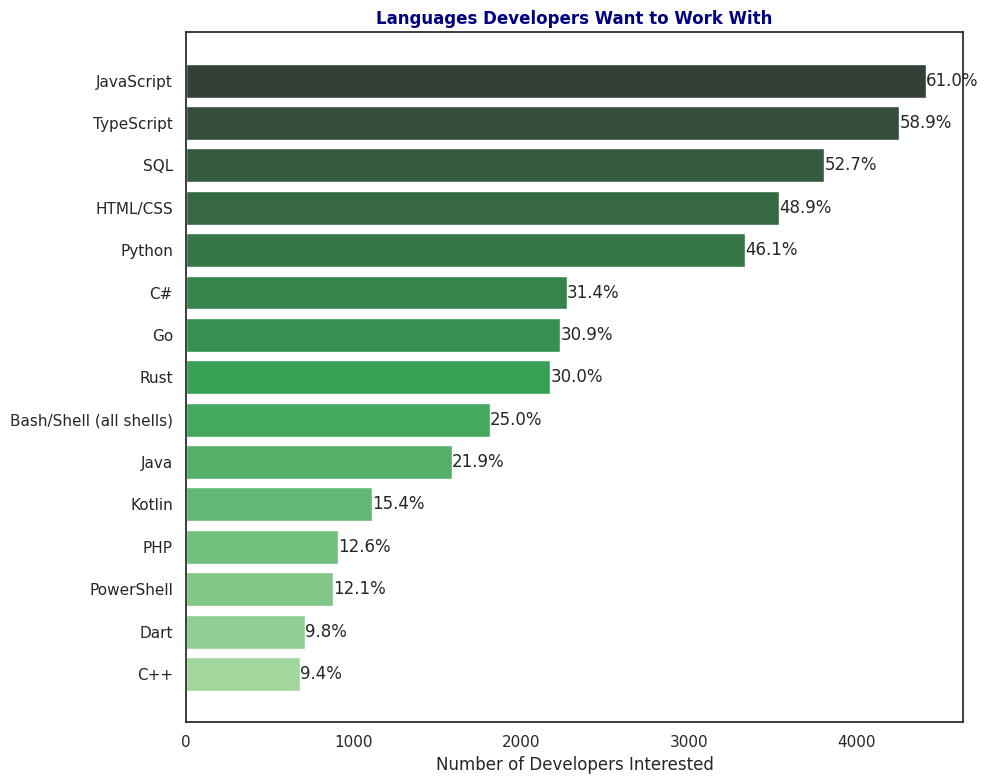

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')


# 'LanguageWantToWorkWith' column contains information about languages developers want to work with

lang_responses = devs_clean['LanguageWantToWorkWith']
language_counter = Counter()

for response in lang_responses:
    if isinstance(response, str):  # Checks if the response is a string
        language_counter.update(response.split(';'))

languages = []
popularity = []

total_responses = len(lang_responses)

for language, count in language_counter.most_common(15):
    languages.append(language)
    popularity.append(count)

languages.reverse()
popularity.reverse()

fig, ax = plt.subplots(figsize=(10, 8))

bars = plt.barh(languages, popularity,
                color=sns.color_palette("Greens_d", len(languages)))

plt.title("Languages Developers Want to Work With", color='navy', fontweight='bold')
plt.xlabel("Number of Developers Interested")

# Add percentages on the bars
for bar, count in zip(bars, popularity):
    percent = count / total_responses * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{percent:.1f}%", ha='left', va='center')

plt.tight_layout()
plt.show()

###<font color='black'> <font face="roboto" size="4">
*Javascript programming language is the language that majority of the developers want to work with in the future*

###<font color='black'> <font face="roboto" size="3">
##Bivariate Exploration

###<font color='black'> <font face="roboto" size="4"> ***Median Salaries***

In [ ]:
devs_clean['Age'] = devs_clean['Age'].replace('Under 18 years old',
                                              '0-17 years old')

<ipython-input-65-b739f4520f17>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


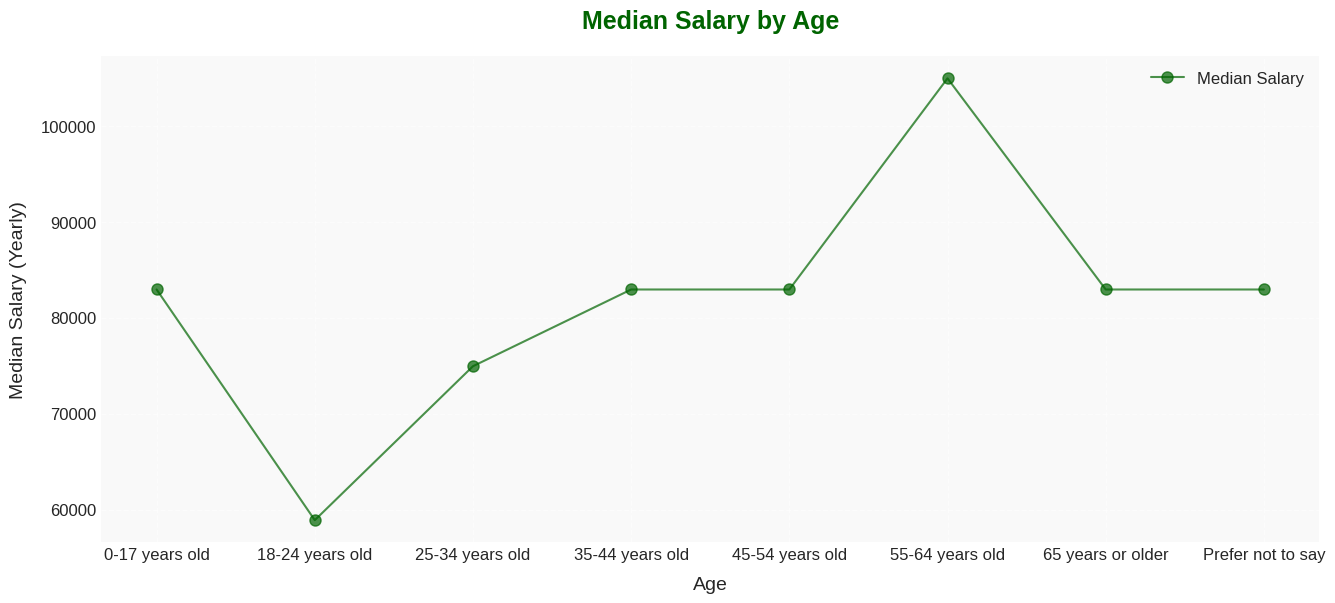

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette to green
plt.style.use('seaborn-darkgrid')

# Group by 'Age' and calculate the median for each group
median_by_age = devs_clean.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Create a visually appealing line graph
plt.figure(figsize=(14, 6))

# Plot the line with green color, star markers, fainter and thinner line style
plt.plot(
    median_by_age['Age'],
    median_by_age['ConvertedCompYearly'],
    marker='o',  # Circle marker
    linestyle='-',  # Solid line style
    color='darkgreen',  # Green color
    markersize=8,  # Adjust marker size
    linewidth=1.5,  # Thicker line
    alpha=0.7,  # Adjust transparency (faintness)
    label='Median Salary'
)

# Customize the appearance
plt.xlabel('Age', fontsize=14, labelpad=10)
plt.ylabel('Median Salary (Yearly)', fontsize=14, labelpad=10)
plt.title('Median Salary by Age', fontsize=18, fontweight='bold', color='darkgreen', pad=20)  # Green, bigger, bold title
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)

# Adding a background color to the plot area
plt.gca().set_facecolor('#f9f9f9')

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)


###<font color='black'> <font face="roboto" size="4">
*Developers in the 55-64 years old have the highest yearly compensations*

###<font color='black'> <font face="roboto" size="4">
**Age vs Coding Experience**

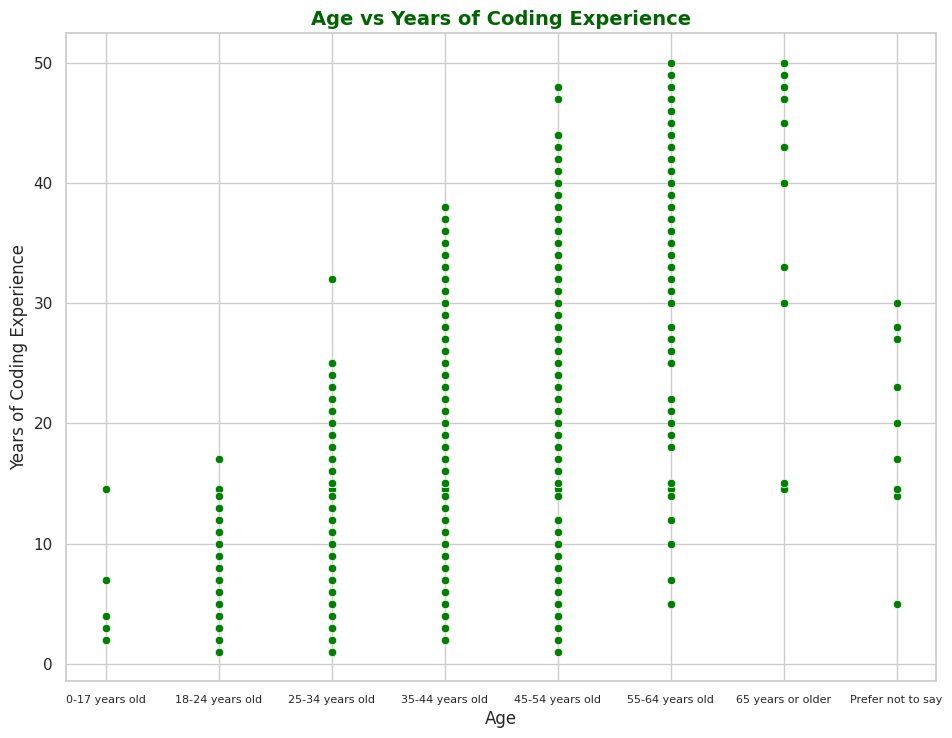

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
devs_clean_sorted = devs_clean.sort_values(by='Age')
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='YearsCode', data=devs_clean_sorted, color='green')

# Add labels and title
plt.title('Age vs Years of Coding Experience', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Years of Coding Experience', fontsize=12)

# Reduce the font size of x-axis labels
plt.xticks(fontsize=8)

plt.show()



###<font color='black'> <font face="roboto" size="4">
*The older the developer the more the experience in terms of the years they have coded*

###<font color='black'> <font face="roboto" size="3">
##Multivariate Exploration

###<font color='black'> <font face="roboto" size="4"> ***Distribution of developers per Country***

<ipython-input-41-7ac39330d69a>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


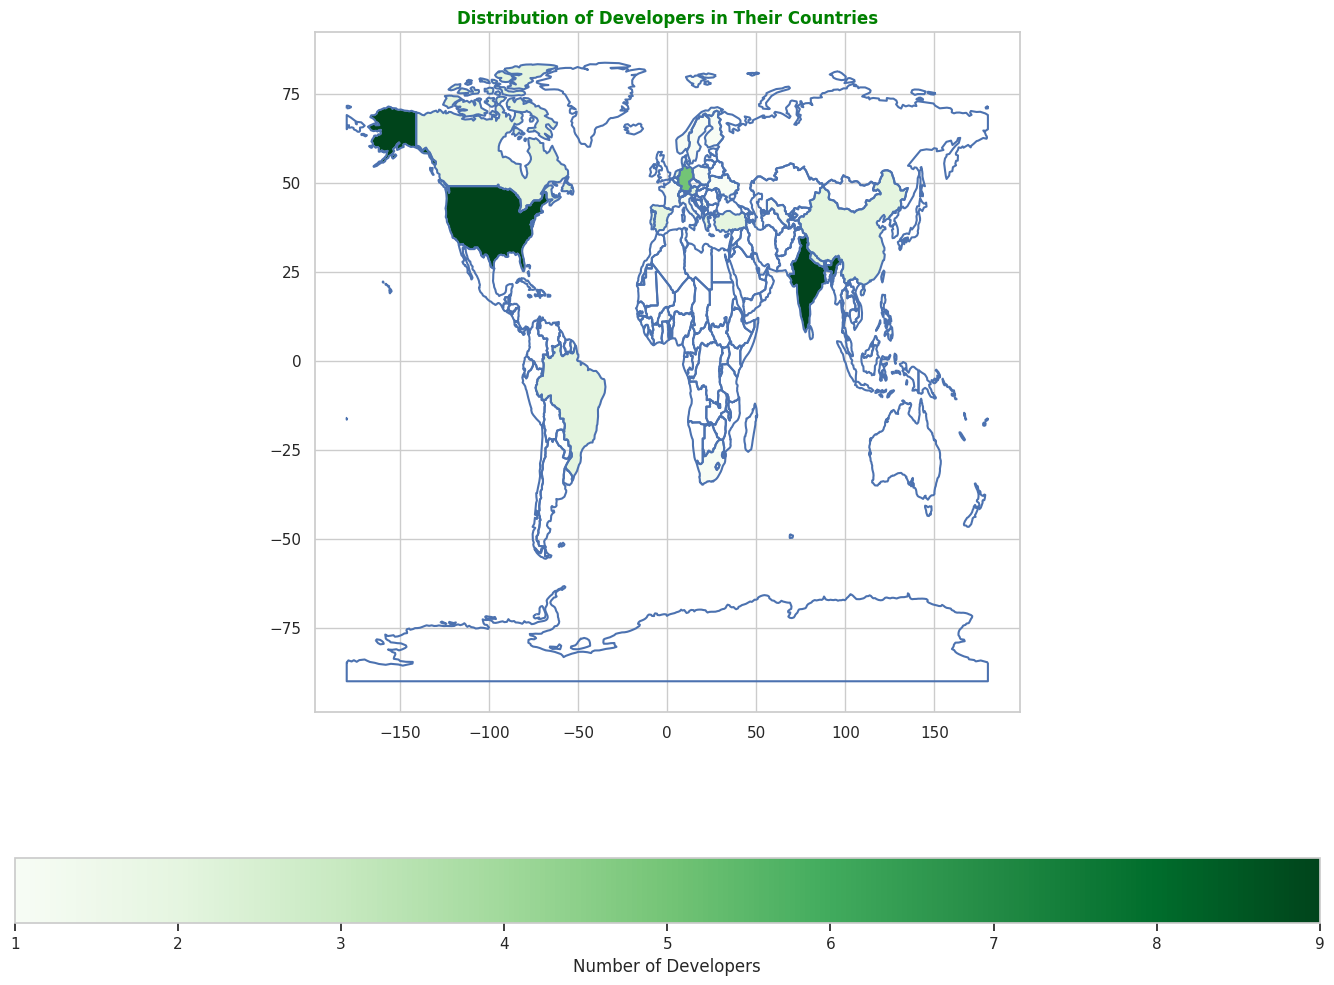

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'Country' is the country name column, and 'geometry' is the geometry column
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the 'index' column to a string data type
country_counts = devs_clean['Country'].value_counts().reset_index()
country_counts['index'] = country_counts['index'].astype(str)

# Merge the world GeoDataFrame with your country counts data
world = world.merge(country_counts,
                    how='left', left_on='name', right_on='index')

# Plot the choropleth map with shades of green and a wider aspect ratio
fig, ax = plt.subplots(1, 1, figsize=(15, 12))  # Increase the first value for a wider map
world.boundary.plot(ax=ax)
world.dropna().plot(column='Country', ax=ax, legend=True,
                    legend_kwds={'label': "Number of Developers",
                                 'orientation': "horizontal"},
                    cmap='Greens',  # Use the Greens colormap
                    aspect=2)

plt.title('Distribution of Developers in Their Countries', fontweight='bold', color='green')
plt.show()


###<font color='black'> <font face="roboto" size="4">
*The choropleth map visualizes the distribution of developers across different countries. Using the geometry of the country and number of developers in each country and the country as the variables.*

#<font color='DarkGreen'> <font face="roboto" size="4"> **SUMMARY CONCLUSIONS**

<center>
    <img src="https://res.cloudinary.com/dezsrv0us/image/upload/c_pad,w_500,h_300/v1706528509/11_uczizc.png">
</center>

<font color='black'> <font face="roboto" size="2">
*JavaScript is the most preffered language among the developers*

<font color='black'> <font face="roboto" size="2">*Javascript also has the highest distribution of popularity among the top 5 programming languages.*

<font color='black'> <font face="roboto" size="2">
*United States has the highest number of developers compared to other countries*

<font color='black'> <font face="roboto" size="2">
*Majority of the developeres prefer working with the Windows operating system*

<font color='black'> <font face="roboto" size="2">
*Microsoft SQL Server is the most preffered database among the developers.*

<font color='black'> <font face="roboto" size="2">
*The majority of the survey respondents work in the information services industry*

<font color='black'> <font face="roboto" size="2">
*The majority of the survey respondents were in the 24-35 years age bracket*

<font color='black'> <font face="roboto" size="2">
*Javascript programming language is the language that majority of the developers want to work with in the future*

<font color='black'> <font face="roboto" size="2">
*Developers in the 55-64 years old have the highest yearly compensations*

<font color='black'> <font face="roboto" size="2">
*The older the developer the more the experience in terms of the years they have coded*

<font color='black'> <font face="roboto" size="2">
*The choropleth map visualizes the distribution of developers across different countries. Using the geometry of the country and number of developers in each country and the country as the variables.*

<center>
    <img src="https://res.cloudinary.com/dezsrv0us/image/upload/v1706529004/12_xwqdt4.png">
</center>